In [1]:
import warnings
warnings.filterwarnings("ignore")
import splitfolders
import seaborn as sns
import pandas as pd
import numpy as np
import os
print('CWD is ',os.getcwd())
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.InceptionResNetV2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Flatten, Conv2D, Dense, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
import tensorflow

CWD is  /Volumes/GoogleDrive/My Drive/Files/Works/Advisee/Senior Projects/2563/detecting CMV/Detect-CMV-main


In [2]:
dataset_folder = "./fundus_dataset"
output = "./preprocess_data"
splitfolders.ratio(dataset_folder, output, seed=3, ratio=(.6, .2, .2))

Copying files: 440 files [00:05, 87.82 files/s]


In [3]:
help(splitfolders.ratio)

Help on function ratio in module splitfolders.split:

ratio(input, output='output', seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None)



In [4]:
height, width = (224,224)
batch_size = 4
train_data_dir = r"./preprocess_data/train"
valid_data_dir = r"./preprocess_data/val"
test_data_dir = r"./preprocess_data/test"

In [5]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input, 
                                 shear_range=0.1, zoom_range=0.1, 
                                 validation_split=0.2,horizontal_flip=True)
#print(train_datagen)
    
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  subset='training')
#print(train_generator)

Found 211 images belonging to 4 classes.


In [6]:
valid_generator=train_datagen.flow_from_directory(valid_data_dir,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  subset='training')

Found 70 images belonging to 4 classes.


In [7]:
test_generator=train_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(height, width),
                                                  batch_size=1,
                                                  class_mode="categorical",
                                                  subset='training')
#print(test_generator.)

Found 75 images belonging to 4 classes.


In [8]:
x,y = test_generator.next()
x.shape
#print(type(y))
#print(type(x))
#print(y)

(1, 224, 224, 3)

In [71]:
base_model = VGG16(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predicions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input,outputs=predicions)
#type(predicions)

In [9]:
base_model = NASNetMobile(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predicions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input,outputs=predicions)
#type(predicions)

20004864/19993432 [==============================] - 1s 0us/step


In [10]:
for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_generator,epochs=30)

Epoch 1/30
53/53 [==============================] - 17s 131ms/step - loss: 2.3995 - accuracy: 0.5972
Epoch 2/30
53/53 [==============================] - 8s 146ms/step - loss: 0.9210 - accuracy: 0.7630
Epoch 3/30
53/53 [==============================] - 7s 129ms/step - loss: 0.8406 - accuracy: 0.7962
Epoch 4/30
53/53 [==============================] - 7s 129ms/step - loss: 0.6854 - accuracy: 0.8199
Epoch 5/30
53/53 [==============================] - 7s 131ms/step - loss: 0.9442 - accuracy: 0.7441
Epoch 6/30
53/53 [==============================] - 7s 128ms/step - loss: 0.7847 - accuracy: 0.8389
Epoch 7/30
53/53 [==============================] - 6s 118ms/step - loss: 0.6528 - accuracy: 0.8341
Epoch 8/30
53/53 [==============================] - 10s 184ms/step - loss: 0.8082 - accuracy: 0.7962
Epoch 9/30
53/53 [==============================] - 11s 215ms/step - loss: 0.5507 - accuracy: 0.8341
Epoch 10/30
53/53 [==============================] - 9s 173ms/step - loss: 0.3315 - accuracy: 0.9

In [53]:
model.save("./Saved_Model/VGG163.h5")

In [12]:
model.save("./Saved_Model/NASNetMobile.h5")

In [13]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score

test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy: ', test_acc)

75/75 - 6s - loss: 0.1761 - accuracy: 0.9600

Test accuracy:  0.9599999785423279


In [ ]:
model = tensorflow.keras.models.load_model("./Saved_Model/VGG162.h5")
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    #print(X_test,Y_test)
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
    
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

In [14]:
model = tensorflow.keras.models.load_model("./Saved_Model/NASNetMobile.h5")
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    #print(X_test,Y_test)
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
    
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

In [15]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score

test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy: ', test_acc)

75/75 - 7s - loss: 0.1855 - accuracy: 0.9200

Test accuracy:  0.9200000166893005


In [9]:
base_model = InceptionResNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predicions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input,outputs=predicions)
#type(predicions)

219070464/219055592 [==============================] - 8s 0us/step


In [10]:
for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_generator,epochs=30)

Epoch 1/30
53/53 [==============================] - 28s 357ms/step - loss: 214.2552 - accuracy: 0.3602
Epoch 2/30
53/53 [==============================] - 19s 367ms/step - loss: 30.5218 - accuracy: 0.4550
Epoch 3/30
53/53 [==============================] - 22s 410ms/step - loss: 26.1469 - accuracy: 0.4550
Epoch 4/30
53/53 [==============================] - 29s 542ms/step - loss: 17.2758 - accuracy: 0.5498
Epoch 5/30
53/53 [==============================] - 24s 443ms/step - loss: 15.0242 - accuracy: 0.4645
Epoch 6/30
53/53 [==============================] - 24s 459ms/step - loss: 9.8386 - accuracy: 0.5592
Epoch 7/30
53/53 [==============================] - 27s 513ms/step - loss: 6.3115 - accuracy: 0.5213
Epoch 8/30
53/53 [==============================] - 28s 520ms/step - loss: 12.2561 - accuracy: 0.4834
Epoch 9/30
53/53 [==============================] - 36s 675ms/step - loss: 5.4134 - accuracy: 0.6066
Epoch 10/30
53/53 [==============================] - 30s 559ms/step - loss: 2.1404 -

In [12]:
model.save("./Saved_Model/InceptionResNetV2.h5")

In [13]:
model = tensorflow.keras.models.load_model("./Saved_Model/InceptionResNetV2.h5")
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    #print(X_test,Y_test)
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
    
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

In [14]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score

test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy: ', test_acc)


75/75 - 17s - loss: 1.2530 - accuracy: 0.3200

Test accuracy:  0.3199999928474426


In [55]:
model = tensorflow.keras.models.load_model("./Saved_Model/VGG162.h5")
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    #print(X_test,Y_test)
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
    
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

In [15]:
model = tensorflow.keras.models.load_model("./Saved_Model/InceptionResNetV2.h5")
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    #print(X_test,Y_test)
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
    
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

In [16]:
model = tensorflow.keras.models.load_model("./Saved_Model/NASNetMobile.h5")
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    #print(X_test,Y_test)
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
    
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

In [17]:
out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['predicted_class'],out_df['actual_class'], rownames=['Actual'],colnames=['Predicted'])

In [18]:
#fo = open('output_result.txt','w')
#fo.write(out_df)
#fo.close()
out_df.to_csv('output_result.csv')

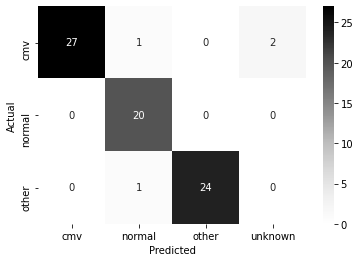

Test accuracy: 94.66666666666667


In [19]:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="Greys")
plt.show()
print('Test accuracy: {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [19]:
from matplotlib.pyplot import imread
from tensorflow.keras.preprocessing.image import img_to_array, load_img

Input image unseen shape: (1, 224, 224, 3)
[[1.0000000e+00 7.3418249e-15 5.7576123e-22 1.9527255e-18]]
Unseen image predicted class: [0]


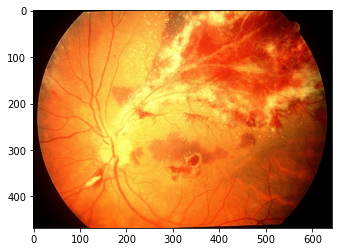

In [60]:
img_unseen_path = 'test.jpg'
img_test = image.load_img(img_unseen_path, target_size=(224,224))
x = image.img_to_array(img_test)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image unseen shape:', x.shape)
project_img = imread(img_unseen_path)
plt.imshow(project_img)
print(model.predict(x))
predict=model.predict(x)
predict=np.argmax(predict,axis=1)
print('Unseen image predicted class:', predict)

In [61]:
im2 = image.load_img('preprocess_data/test2/other/039-other.jpg', target_size=(224,224))
x = image.img_to_array(im2)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)
predict = model.predict(x)
print(model.predict(x))
predict=np.argmax(predict,axis=1)
print('Unseen image predicted class:', predict)

[[4.4389866e-13 1.3930910e-09 1.0000000e+00 2.7237284e-17]]
Unseen image predicted class: [2]


In [20]:
output_prec = open('output_prec.csv', 'w')
directory = os.getcwd() + '/All images'

#print(directory)
for filename in os.listdir(directory):
   with open(os.path.join(directory, filename), 'r') as f: # open in readonly mode
        file_dic = directory + '/' + filename
        #print(file_dic)
        #print(filename)
        im2 = image.load_img(file_dic, target_size=(224,224))
        x = image.img_to_array(im2)
        x = np.expand_dims(x,axis=0)
        x = preprocess_input(x)
        predict = model.predict(x)
        #print(model.predict(x))
        predict=np.argmax(predict,axis=1)
        print(filename, 'Unseen image predicted class:', predict)
        #print(type(predict))
        #output = filename + predict
        #print(output)
        #print(predict)
        #output_prec.write(filename)
        #output_prec.write(':')
        #output_prec.write(predict.fromstring(ts, dtype=str))
        #output_prec.write('\n')

103-unk.jpg Unseen image predicted class: [1]
138-nor.jpg Unseen image predicted class: [1]
154-unk.jpg Unseen image predicted class: [3]
164-nor.jpg Unseen image predicted class: [0]
184-cmv.jpg Unseen image predicted class: [0]
013-nor.jpg Unseen image predicted class: [0]
036-other.jpg Unseen image predicted class: [2]
083-nor.jpg Unseen image predicted class: [0]
105-other.jpg Unseen image predicted class: [2]
110-cmv.jpg Unseen image predicted class: [2]
126-nor.jpg Unseen image predicted class: [1]
163-cmv.jpg Unseen image predicted class: [2]
174-nor.jpg Unseen image predicted class: [0]
189-cmv.jpg Unseen image predicted class: [0]
001-nor.jpg Unseen image predicted class: [1]
002-nor.jpg Unseen image predicted class: [0]
003-nor.jpg Unseen image predicted class: [0]
004-nor.jpg Unseen image predicted class: [0]
005-nor.jpg Unseen image predicted class: [1]
006-nor.jpg Unseen image predicted class: [2]
007-nor.jpg Unseen image predicted class: [1]
008-nor.jpg Unseen image predi

In [20]:
#img_unseen_path = 'diabetic.jpg'
#img_test = image.load_img(img_unseen_path, target_size=(224,224))
#x = image.img_to_array(img_test)
#x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
#print('Input image unseen shape:', x.shape)
#project_img = imread(img_unseen_path)
#plt.imshow(project_img)
##print(model.predict(x))
#predict=model.predict(x)
#predict=np.argmax(predict,axis=1)
#print('Unseen image predicted class:', predict)

In [21]:
#img_unseen_path = 'diabetic_1.jpg'
#img_test = image.load_img(img_unseen_path, target_size=(224,224))
#x = image.img_to_array(img_test)
#x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
#print('Input image unseen shape:', x.shape)
#project_img = imread(img_unseen_path)
#plt.imshow(project_img)
##print(model.predict(x))
#predict=model.predict(x)
#predict=np.argmax(predict,axis=1)
#print('Unseen image predicted class:', predict)

In [22]:
#img_unseen_path = 'test1.jpg'
#img_test = image.load_img(img_unseen_path, target_size=(224,224))
#x = image.img_to_array(img_test)
#x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
#print('Input image unseen shape:', x.shape)
#project_img = imread(img_unseen_path)
#plt.imshow(project_img)
##print(model.predict(x))
#predict=model.predict(x)
#predict=np.argmax(predict,axis=1)
#print('Unseen image predicted class:', predict)

In [23]:
#img_unseen_path = 'unk.jpg'
#img_test = image.load_img(img_unseen_path, target_size=(224,224))
#x = image.img_to_array(img_test)
#x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
#print('Input image unseen shape:', x.shape)
#project_img = imread(img_unseen_path)
#plt.imshow(project_img)
##print(model.predict(x))
#predict=model.predict(x)
#predict=np.argmax(predict,axis=1)
#print('Unseen image predicted class:', predict)

In [24]:
#img_unseen_path = 'blur.jpg'
#img_test = image.load_img(img_unseen_path, target_size=(224,224))
#x = image.img_to_array(img_test)
#x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
#print('Input image unseen shape:', x.shape)
#project_img = imread(img_unseen_path)
#plt.imshow(project_img)
##print(model.predict(x))
#predict=model.predict(x)
#predict=np.argmax(predict,axis=1)
#print('Unseen image predicted class:', predict)

In [25]:
out_df

,predicted_class,actual_class
0,other,other
1,normal,normal
2,other,other
3,unknown,cmv
4,normal,unknown
...,...,...
70,cmv,cmv
71,normal,cmv
72,normal,normal
73,normal,normal


In [26]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
out_df['actual_class']= label_encoder.fit_transform(out_df['actual_class'])
out_df['predicted_class']= label_encoder.fit_transform(out_df['predicted_class'])

out_df

,predicted_class,actual_class
0,2,2
1,1,1
2,2,2
3,3,0
4,1,3
...,...,...
70,0,0
71,1,0
72,1,1
73,1,1


- class 0 = CMV retinitis
- class 1 = normal
- class 2 = other retinitis
- class 3 = unknown or can't diagnosis

In [27]:
inverted = label_encoder.inverse_transform(out_df['actual_class'])
inverted

array(['other', 'normal', 'other', 'cmv', 'unknown', 'other', 'other',
       'other', 'other', 'cmv', 'other', 'cmv', 'normal', 'other',
       'normal', 'other', 'other', 'cmv', 'other', 'cmv', 'other', 'cmv',
       'normal', 'other', 'cmv', 'cmv', 'cmv', 'normal', 'cmv', 'normal',
       'cmv', 'cmv', 'cmv', 'normal', 'other', 'other', 'normal', 'cmv',
       'cmv', 'normal', 'other', 'other', 'normal', 'cmv', 'normal',
       'other', 'normal', 'unknown', 'cmv', 'other', 'cmv', 'other',
       'normal', 'cmv', 'cmv', 'normal', 'normal', 'cmv', 'normal',
       'other', 'other', 'normal', 'cmv', 'other', 'cmv', 'cmv', 'cmv',
       'other', 'normal', 'normal', 'cmv', 'cmv', 'normal', 'normal',
       'normal'], dtype=object)

In [28]:
print("Train Cohen Kappa score: %.3f" % cohen_kappa_score(out_df['predicted_class'], out_df['actual_class'].astype('int'), 
                                                          weights='quadratic'))
print("Train Accuracy score : %.3f" % accuracy_score( out_df['actual_class'].astype('int'),out_df['predicted_class']))

Train Cohen Kappa score: 0.811
Train Accuracy score : 0.907


acc,kappa
1.000, 1.000
0.982, 0.960
1.000, 1.000

In [29]:
tensorflow.version.VERSION

'2.6.0'

In [30]:
print()